In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
mpl.rcParams['font.size'] = 16
mpl.rcParams['figure.figsize'] = [10,6]

In [3]:
url = 'https://raw.githubusercontent.com/allanspadini/linear_estatistica/main/media_salarial.csv'

In [4]:
salarial = pd.read_csv(url, sep='\t')

In [5]:
salarial.head()

,Anos,Salario
0,9.096218,78311.160754
1,14.637429,103897.664526
2,12.255808,97836.261015
3,7.215160,80550.256380
4,6.905628,68555.820963


Vamos fazer uma compração para saber como os dados se comportam.

Para isso vamos plotar um gráfico de dispersão entre duas variáveis.

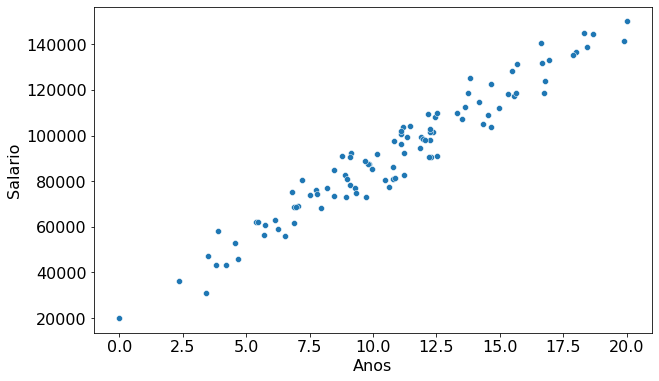

In [7]:
sns.scatterplot(x='Anos', y='Salario', data=salarial);

>Podemos ver que existe uma relação linear positiva, ou seja, quanto mais se passam os anos, mais o salário tende a aumentar

## <font color=blue> Covariância </font>

A covariância é a medida do grau de interdependência numérica entre duas variáveis. 

### Covariância populacional

\begin{equation}
\sigma_{xy} = \frac{1}{n} \sum_{i=1}^n (X_i - \mu_x)(Y_i - \mu_y)
\end{equation}

### Covariância amostral
\begin{equation}
S_{xy} = \frac{1}{n-1} \sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})
\end{equation}

In [9]:
# a população do nosso conjunto 'salarial' é de 100 elementos
salarial.shape

(100, 2)

In [10]:
amostra = salarial.sample(n=20, random_state=202)

In [11]:
amostra

,Anos,Salario
34,10.630834,77206.628743
8,11.451010,103966.618570
94,10.777052,86080.906761
66,10.470418,80294.559253
50,6.824709,75147.590743
87,13.610841,112452.524502
38,10.802709,81088.970550
17,17.993325,136438.829553
90,5.466448,62164.059695
13,8.921098,73119.734956


In [14]:
# vamos agora calcular a covariancia da nossa amostra
amostra.cov()

,Anos,Salario
Anos,14.191227,8.544902e+04
Salario,85449.017586,5.552975e+08


>Existe uma covariancia positiva, como podemos ver nos números

O fato de a covariancia entre Anos e Salario ser maior do que a relação entre Anos e Anos é devido a escala dos números. Enquanto a escala de Salario começa na ordem dos 20 mil e vai até 140 mil, a escala dos Anos vai de 0 a 20 somente. Essa grande diferença na escala influencia no cálculo final.

Para padronizar essas escalas e nos trazer uma informação mais precisa do grau de interdependencia entre variáveis podemos calcular a correlação.

## <font color=blue> Correlação </font>

Depende do grau de covariancia e dos desvios padrão

Os valores são normalizados e variam de 0 a 1. Dessa forma fica mais simples identificar os graus de interdependencia.

### Coeficiente de correlação de Pearson - dados populacionais

# $$\rho_{xy} = \frac{\sigma_{xy}}{\sigma_{x}\sigma_{y}}$$

### Coeficiente de correlação de Pearson - dados amostrais

# $$r_{xy} = \frac{s_{xy}}{s_{x}s_{y}}$$

Onde

$\sigma_{xy}$ = covariância populacional entre x e y

$s_{xy}$ = covariância amostral entre x e y

$\sigma_{x}$ e $\sigma_{y}$ = desvios padrão populacionais de x e y, respectivamente

$s_{x}$ e $s_{y}$ = desvios padrão amostrais de x e y, respectivamente

In [16]:
amostra.corr()

,Anos,Salario
Anos,1.000000,0.962574
Salario,0.962574,1.000000


>Quanto mais próximo de 1 mais forte é a correlação. Nesse caso, veja que agora fica fácil notar que exsite uma correlação fortíssima entre Anos e Salarios.

>No entanto, importante enfatizar que correlação não quer dizer causalidade.

## <font color=blue> Regressão Linear </font>

<img src="https://caelum-online-public.s3.amazonaws.com/1273-estatistica-parte4/01/img027.png" width=50%>

In [18]:
import statsmodels.api as sm

In [19]:
x = sm.add_constant(salarial['Anos'])

In [20]:
x.head()

,const,Anos
0,1.0,9.096218
1,1.0,14.637429
2,1.0,12.255808
3,1.0,7.215160
4,1.0,6.905628


In [21]:
y = salarial['Salario']

In [23]:
#fazendo o ajuste da reta
resultado_regressao = sm.OLS(y, x).fit()

In [25]:
resultado_regressao.params

const    22755.182146
Anos      6367.639175
dtype: float64

In [26]:
# atribuindo os resultados acima às respectivas variáveis
beta_1 = resultado_regressao.params[0]
beta_2 = resultado_regressao.params[1]

>Beta1 e Beta2 são simplesmente o ponto de interceptação e curvatura da reta

## <font color=blue>  Intervalo de confiança </font>

O intervalo de confiança propõe uma gama de valores plausíveis para um parâmetro desconhecido. O intervalo de confiança possui um nível de confiança associado. O nível de confiança padrão é 95%. 

In [29]:
# usaremos o statsmodels para calcular esse intervalo
resultado_regressao.conf_int()

,0,1
const,19067.657980,26442.706312
Anos,6050.119397,6685.158952


In [34]:
# usaremos o .predict() para calcularmos previsões
# vamos fazer esse cálculo e criar uma nova coluna para isso
salarial['y_previsto'] = resultado_regressao.predict() 

In [31]:
salarial.head()

,Anos,Salario,y_previsto
0,9.096218,78311.160754,80676.613985
1,14.637429,103897.664526,115961.045460
2,12.255808,97836.261015,100795.744300
3,7.215160,80550.256380,68698.714847
4,6.905628,68555.820963,66727.732594


>Veja que os valores de y_previsto realmente se aproximam bastante do Salario real

>Vamos observar isso plotando um gráfico

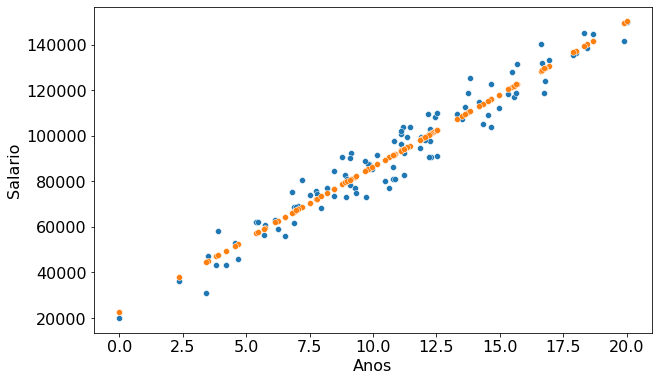

In [36]:
# base de dados original
sns.scatterplot(x='Anos', y='Salario', data=salarial)

# reta prevista
sns.scatterplot(x='Anos', y='y_previsto', data=salarial);

## <font color=blue>  Resíduos </font>

Depois de conhecidos o beta1 e beta2 a gente consegue estimar valores para pontos que não temos na nossa reta, ou seja, fazer previsões. Para isso, vamos criar pontos além do que existem no eixo x do gráfico. Os anos vão somente do 0 ao 20. Então vamos usar o método linspace para criar pontos do 21 ao 30. 

In [62]:
Xnovo = np.linspace(20, 30, 11)

In [63]:
Xnovo

array([20., 21., 22., 23., 24., 25., 26., 27., 28., 29., 30.])

In [65]:
# vamos adicionar nova coluna representando esses valores
Xnovo = sm.add_constant(Xnovo)

In [40]:
# prevendo pontos fora da amostra original
fora_da_amostra = resultado_regressao.predict(Xnovo)

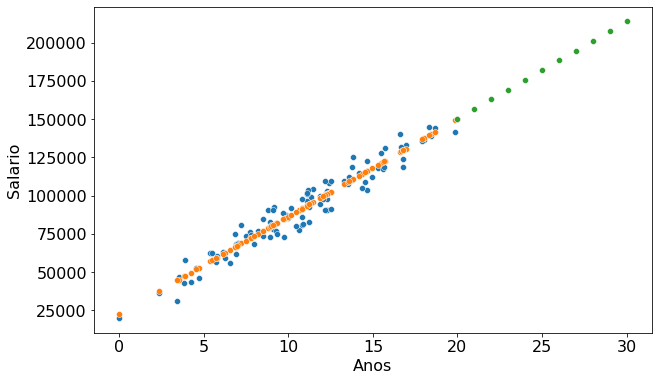

In [60]:
# agora vamos plotar os novos pontos e respectivas previsões no gráfico de dispesão
sns.scatterplot(x='Anos', y='Salario', data=salarial)
sns.scatterplot(x='Anos', y='y_previsto', data=salarial)
sns.scatterplot(x=Xnovo[:,1], y=fora_da_amostra);

Resíduos são a diferença entre os pontos previstos e os pontos conhecidos do gráfico. Serve para vermos o quão longe estamos da realidade.

In [72]:
salarial['Residuo'] = resultado_regressao.resid

Premissas para identificar resíduos

1. Média igual ou próxima de zero

In [73]:
salarial['Residuo'].mean()

1.8917489796876908e-11

2. Os valores dos resíduos são independentes

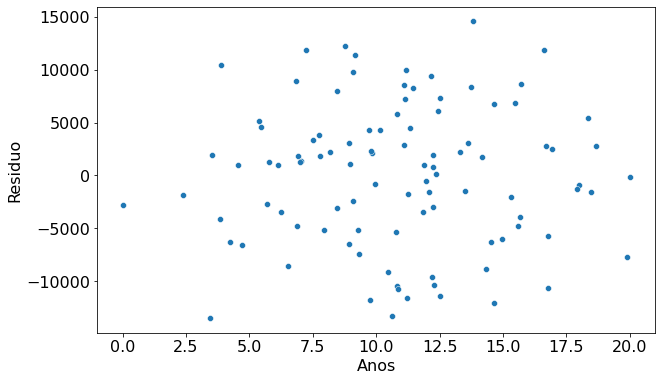

In [74]:
sns.scatterplot(x=salarial['Anos'], y=salarial['Residuo']);

>Como podemos ver os valores são independentes porque não seguem nenhum padrão

<AxesSubplot:xlabel='y_previsto', ylabel='Residuo'>

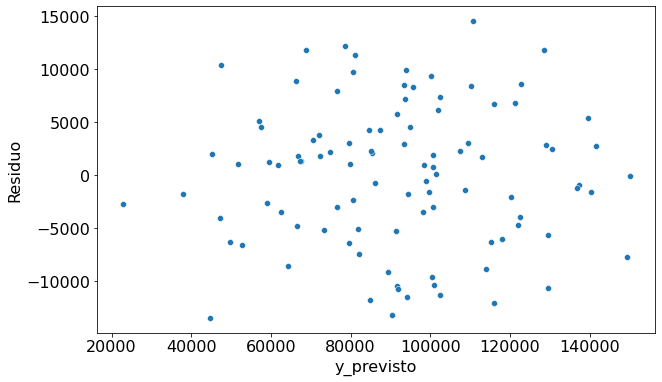

In [48]:
sns.scatterplot(x=salarial['y_previsto'], y=salarial['Residuo'])

3. Variancia dos resíduos é a mesma para todos os valores de X;

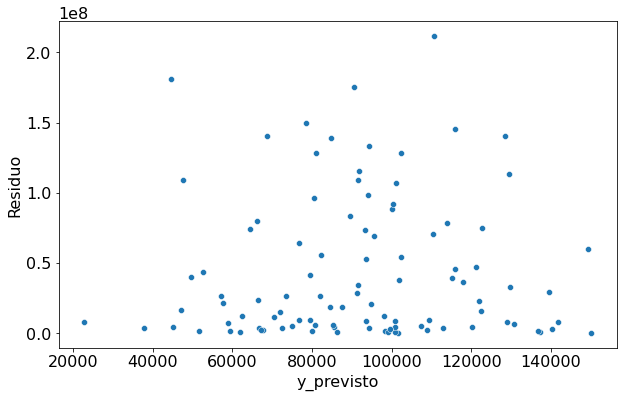

In [77]:
# no eixo y, postamos o residuo ao quadrado para obtermos a variancia
sns.scatterplot(x=salarial['y_previsto'], y=salarial['Residuo']**2);

## <font color=blue>  Coeficiente de determinação - $R^2$ </font>

O quanto nossos dados estão realmente interdependentes

Quanto mais próximo de 1 mais interdependente os dados são.

No caso de número positivo significa que os dados crescem juntamente, ou seja, enquanto um cresce o outro também cresce. Se for npumero negativo eles seguem direções contrárias, ou seja, na medida que um sobe o outro desde.

In [79]:
# usaremos o statsmodels para calcular o r quadrado
resultado_regressao.rsquared

0.9417294727711081